### 1.
Desenvolva uma função que crie composições musicais baseadas em sinusóides (e outras funções como ondas
triangulares e dentes de serra). A função tem como argumentos de entrada uma lista de tuplos representantes
das notas e suas durações no formato (nota, número de unidades de tempo) e a unidade de tempo (em bpm). A
nota deve ser expressa usando a notação ABC, exemplo: ( (’c’, 4), (’e’, 4), (’g’, 4), (’c5’, 1) ) ). A função deve
retornar um array com as amplitudes instantaneas correspondentes à composição musical. Deve exemplificar o
funcionamento da função com a criação de uma composição musical. Visualize o sinal no domínio do tempo e
na frequência (espectro e espectrograma). Oiça o sinal criado e altere os bpms para verificar as diferenças.

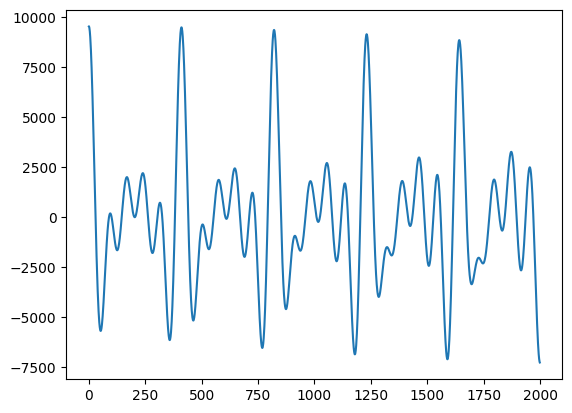

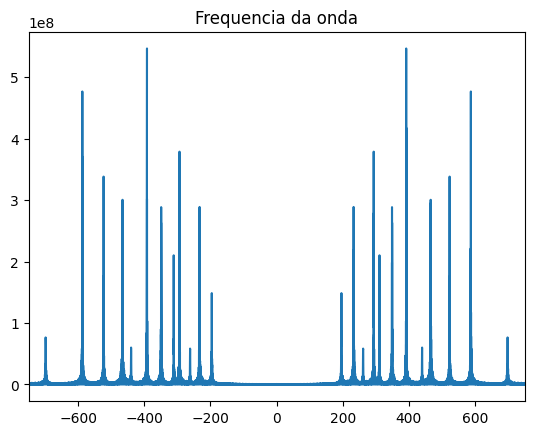

In [2]:
import numpy as np
from IPython.display import Audio, display
import matplotlib.pyplot as plt

Fs = 48000
bpm = 119  # batidas por minuto
musica_array = []

key_number = {
'C3': 23, 'C#3': 24, 'D3': 25, 'D#3': 26, 'E3': 27, 'F3': 28, 'F#3': 29, 'G3': 30,
'G#3': 31, 'A3': 32, 'A#3': 33, 'B3': 34, 'C4': 35, 'C#4': 36, 'D4': 37, 'D#4': 38,
'E4': 39, 'F4': 40, 'F#4': 41, 'G4': 42, 'G#4': 43, 'A4': 44, 'A#4': 45, 'B4': 46,
'C5': 47, 'C#5': 48, 'D5': 49, 'D#5': 50, 'E5': 51, 'F5': 52, 'F#5': 53, 'G5': 54,
'G#5': 55, 'A5': 56, 'A#5': 57, 'B5': 58, 'C6': 59
}

def get_key(key, velocity, duration):
    keynum = key_number[key]
    frequency = 2 ** ((keynum - 44) / 12) * 440
    duration = 119 / bpm * duration # a duração da nota é 1/4 de uma bar para um compasso 4/4
    t = np.arange(0, duration, 1 / Fs)
    return 40 * velocity * np.cos(2 * np.pi * frequency * t)

def add_chord(key_array):
    chord = np.sum(key_array, axis=0)
    musica_array.append(chord)

def musica():
    #MY EYES by Travis Scott
    add_chord([get_key('D5', 59.5, 1.5), get_key('A#4', 59.5, 1.5), get_key('F4', 59.5, 1.5), get_key('A#3', 59.5, 1.5)])
    add_chord([get_key('D5', 59.5, 0.3), get_key('A#4', 59.5, 0.3), get_key('D4', 59.5, 0.3), get_key('A#3', 59.5, 0.3)])
    add_chord([get_key('C5', 59.5, 2.2), get_key('G4', 59.5, 2.2), get_key('F4', 59.5, 2.2), get_key('D4', 59.5, 2.2)])
    add_chord([get_key('A#4', 59.5, 1.6), get_key('C5', 59.5, 1.6), get_key('D5', 59.5, 1.6), get_key('F5', 59.5, 1.6)])
    add_chord([get_key('A#4', 59.5, 0.3), get_key('C5', 59.5, 0.3), get_key('D5', 59.5, 0.3), get_key('F5', 59.5, 0.3)])
    add_chord([get_key('C5', 59.5, 1.4), get_key('A#4', 59.5, 1.4), get_key('F4', 59.5, 1.4), get_key('D4', 59.5, 1.4)])
    add_chord([get_key('A#4', 119, 0.5), get_key('F4', 59.5, 0.5), get_key('D4', 59.5, 0.5), get_key('G3', 59.5, 0.5)])
    add_chord([get_key('G4', 119, 1.8), get_key('D#4', 59.5, 1.8), get_key('D4', 59.5, 1.8), get_key('A#3', 59.5, 1.8)])
    add_chord([get_key('D5', 119, 1.8), get_key('A#4', 59.5, 1.8), get_key('D4', 59.5, 1.8), get_key('G3', 59.5, 1.8)])
    add_chord([get_key('A#4', 119, 0.5), get_key('F4', 59.5, 0.5), get_key('D4', 59.5, 0.5), get_key('G3', 59.5, 0.5)])
    add_chord([get_key('G4', 119, 2.4), get_key('D#4', 59.5, 2.4), get_key('D4', 59.5, 2.4), get_key('A#3', 59.5, 2.4)])
    add_chord([get_key('D5', 119, 1), get_key('A#4', 59.5, 1), get_key('F4', 59.5, 1), get_key('A#3', 59.5, 1)])
    add_chord([get_key('C5', 119, 1), get_key('A4', 59.5, 1), get_key('F4', 59.5, 1), get_key('C4', 59.5, 1)])
    add_chord([get_key('D5', 59.5, 1.5), get_key('A#4', 59.5, 1.5), get_key('F4', 59.5, 1.5), get_key('A#3', 59.5, 1.5)])

musica()
musica = np.hstack(musica_array)

display(Audio(musica, rate=Fs))

plt.plot(musica[:2000])
plt.show()

freqs = np.fft.fftfreq(len(musica), 1/Fs)
spectrum = np.abs(np.fft.fft(musica))
plt.plot(freqs, spectrum)
plt.title("Frequencia da onda")
plt.xlim(-750, 750)
plt.show()

### 2.
Crie uma nova função onde seja implementada o modelo ADSR de modo a que as notas criadas soem de forma
mais realista. Deverá ser possível parametrizar o tempo de Attack/Decay/Sustain/Release em percentagem do
tempo da nota / ou em alternativa com valores constantes. Analise as diferenças comparando com a versão
original.

In [3]:
musica_array = []

def get_key(key, velocity, duration, attack_p=0.03, decay_p=3, sustain_level=0, release_p=0.03):
    keynum = key_number[key]
    frequency = 2 ** ((keynum - 44) / 12) * 440
    note_duration_sec = 119 / bpm * duration

    t = np.arange(0, note_duration_sec, 1 / Fs)
    waveform = 40 * (velocity / 127) * np.cos(2 * np.pi * frequency * t)

    enveloped_waveform = apply_adsr_envelope(waveform, note_duration_sec, Fs, attack_p, decay_p, sustain_level, release_p)

    return enveloped_waveform

def apply_adsr_envelope(waveform, duration, Fs, attack_p=0.03, decay_p=3, sustain_level=0, release_p=0.03):

    total_samples = len(waveform)
    t = np.linspace(0, duration, total_samples)
    # Calcular a duração em segundos para cada fase
    
    attack_dur = attack_p    
    release_dur = release_p
    sustain_level = -(1/decay_p) * duration + 1
    sustain_dur = 0
    decay_dur = duration - attack_dur - release_dur - sustain_dur
    
    attack_samples = int(attack_dur * Fs)
    decay_samples = int(decay_dur * Fs)
    sustain_samples = int(sustain_dur * Fs)
    release_samples = total_samples - attack_samples - decay_samples - sustain_samples

    envelope = np.zeros(total_samples)

    if attack_samples > 0:
        envelope[:attack_samples] = np.linspace(0, 1, attack_samples)

    if decay_samples > 0:
        start_decay = attack_samples
        end_decay = start_decay + decay_samples
        envelope[start_decay:end_decay] = np.linspace(1, sustain_level, decay_samples)

    if sustain_samples > 0:
        start_sustain = attack_samples + decay_samples
        end_sustain = start_sustain + sustain_samples
        envelope[start_sustain:end_sustain] = sustain_level

    if release_samples > 0:
        start_release = attack_samples + decay_samples + sustain_samples
        envelope[start_release:] = np.linspace(sustain_level, 0, release_samples)

    return waveform * envelope

musica()

musica = np.hstack(musica_array)

display(Audio(musica, rate=Fs))

TypeError: 'numpy.ndarray' object is not callable

### 3.
De modo a explorar a utilização de sinais stereo, implemente uma composição onde a melodia fica no canal
esquerdo e os acordes no canal direito. Opcional: experimente realizar operações de panning na composição
fazendo alterando a intensidade entre canais esquerdo e direito.

In [ ]:
def add_chord(key_array):
    chord = np.sum(key_array, axis=0)
    acorde_array.append(chord)
    
acorde_array = []
melodia_array = []

def musica():
    add_chord([get_key('A#4', 59.5, 1.5), get_key('F4', 59.5, 1.5), get_key('A#3', 59.5, 1.5)])
    add_chord([get_key('A#4', 59.5, 0.3), get_key('D4', 59.5, 0.3), get_key('A#3', 59.5, 0.3)])
    add_chord([get_key('G4', 59.5, 2.2), get_key('F4', 59.5, 2.2), get_key('D4', 59.5, 2.2)])
    add_chord([get_key('C5', 59.5, 1.6), get_key('D5', 59.5, 1.6), get_key('F5', 59.5, 1.6)])
    add_chord([get_key('C5', 59.5, 0.3), get_key('D5', 59.5, 0.3), get_key('F5', 59.5, 0.3)])
    add_chord([get_key('A#4', 59.5, 1.4), get_key('F4', 59.5, 1.4), get_key('D4', 59.5, 1.4)])
    add_chord([get_key('F4', 59.5, 0.5), get_key('D4', 59.5, 0.5), get_key('G3', 59.5, 0.5)])
    add_chord([get_key('D#4', 59.5, 1.8), get_key('D4', 59.5, 1.8), get_key('A#3', 59.5, 1.8)])
    add_chord([get_key('A#4', 59.5, 1.8), get_key('D4', 59.5, 1.8), get_key('G3', 59.5, 1.8)])
    add_chord([get_key('F4', 59.5, 0.5), get_key('D4', 59.5, 0.5), get_key('G3', 59.5, 0.5)])
    add_chord([get_key('D#4', 59.5, 2.4), get_key('D4', 59.5, 2.4), get_key('A#3', 59.5, 2.4)])
    add_chord([get_key('A#4', 59.5, 1), get_key('F4', 59.5, 1), get_key('A#3', 59.5, 1)])
    add_chord([get_key('A4', 59.5, 1), get_key('F4', 59.5, 1), get_key('C4', 59.5, 1)])
    add_chord([get_key('A#4', 59.5, 1.5), get_key('F4', 59.5, 1.5), get_key('A#3', 59.5, 1.5)])

    melodia_array.append(get_key('D5', 150, 1.5))
    melodia_array.append(get_key('D5', 150, 0.3))
    melodia_array.append(get_key('C5', 150, 2.2))
    melodia_array.append(get_key('A#4', 150, 1.6))
    melodia_array.append(get_key('A#4', 150, 0.3))
    melodia_array.append(get_key('C5', 150, 1.4))
    melodia_array.append(get_key('A#4', 150, 0.5))
    melodia_array.append(get_key('G4', 150, 1.8))
    melodia_array.append(get_key('D5', 150, 1.8))
    melodia_array.append(get_key('A#4', 150, 0.5))
    melodia_array.append(get_key('G4', 150, 2.4))
    melodia_array.append(get_key('D5', 150, 1))
    melodia_array.append(get_key('C5', 150, 1))
    melodia_array.append(get_key('D5', 150, 1.5))
    
musica()

left_side = np.hstack(melodia_array)
right_side = np.hstack(acorde_array)

stereo_signal = np.array([left_side, right_side])

display(Audio(stereo_signal, rate=Fs))

### 4.
Considere agora o sinal c(t) = b(t) × Envolvente(t). Realizem uma operação de fade-in e fade-out produzindo
o sinal Envolvente(t) adequado. Represente os espectrograma de modo a analisar simultaneamente o domínio
tempo e frequência.

In [ ]:
from scipy.signal import spectrogram

acorde_array = []
melodia_array = []

musica()

left_side = np.hstack(melodia_array)
right_side = np.hstack(acorde_array)

duracao_sinal = len(left_side) / Fs
fade_in_dur = 3
fade_out_dur = 3

if fade_in_dur + fade_out_dur > duracao_sinal:
    total_fade_dur = duracao_sinal * 0.8
    fade_in_dur = total_fade_dur / 2
    fade_out_dur = total_fade_dur / 2
    
fade_in_samples = int(fade_in_dur * Fs)
fade_out_samples = int(fade_out_dur * Fs)
total_samples = len(left_side)
sustain_samples = total_samples - fade_in_samples - fade_out_samples

envolvente = np.ones(total_samples)

if fade_in_samples > 0:
    envolvente[:fade_in_samples] = np.linspace(0, 1, fade_in_samples)

if fade_out_samples > 0:
    start_fade_out = total_samples - fade_out_samples
    envolvente[start_fade_out:] = np.linspace(1, 0, fade_out_samples)
    
sinal_com_fade_acordes = left_side * envolvente # c(t) = b(t) * Envolvente(t)
sinal_com_fade_melodia = right_side * envolvente # c(t) = b(t) * Envolvente(t)

stereo_signal = np.array([sinal_com_fade_acordes, sinal_com_fade_melodia])

display(Audio(stereo_signal, rate=Fs))

plt.figure(figsize=(12, 6))
Pxx, freqs, times, im = plt.specgram(sinal_com_fade_acordes, NFFT=1024, Fs=Fs, noverlap=512, mode='magnitude')
cbar = plt.colorbar(im, label='Intensidade (dB)')
plt.title('Espectrograma do Sinal dos Acordes com Fade-in e Fade-out')
plt.xlabel('Tempo (s)')
plt.ylabel('Frequência (Hz)')
plt.ylim(20, 20000)
plt.show()

plt.figure(figsize=(12, 6))
Pxx, freqs, times, im = plt.specgram(sinal_com_fade_melodia, NFFT=1024, Fs=Fs, noverlap=512, mode='magnitude')
cbar = plt.colorbar(im, label='Intensidade (dB)')
plt.title('Espectrograma do Sinal da Melodia com Fade-in e Fade-out')
plt.xlabel('Tempo (s)')
plt.ylabel('Frequência (Hz)')
plt.ylim(20, 20000)
plt.show()